#### file for second branch

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
train = pd.read_csv(r'C:\Users\novoselya.pa\Nov_work\DS\_study notebooks\_study datasets\hotel_train.csv')
test = pd.read_csv(r'C:\Users\novoselya.pa\Nov_work\DS\_study notebooks\_study datasets\hotel_test.csv')

## Data Exploration

In [4]:
display(train.head(3))
display(test.head(3))

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4


In [5]:
print(train.info(), '\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

#### Lead_time, adults, children and babies should be converted to the type 'int' 

In [7]:
train[["lead_time", 'adults', 'children', 'babies']] = train[["lead_time", 'adults', 'children', 'babies']].astype(int)
test[["lead_time", 'adults', 'children', 'babies']] = test[["lead_time", 'adults', 'children', 'babies']].astype(int)

#### Let's check duplicates in datasets

In [9]:
print('Количество дубликатов в тренировочном наборе:', train.duplicated().sum())
print('Количество дубликатов в тестовом наборе:', test.duplicated().sum())

Количество дубликатов в тренировочном наборе: 0
Количество дубликатов в тестовом наборе: 0


In [10]:
print(train.describe())

                 id   is_canceled     lead_time  arrival_date_year  \
count  65229.000000  65229.000000  65229.000000       65229.000000   
mean   43544.069172      0.368609     96.337917        2015.719021   
std    25614.858971      0.482431     96.127545           0.449481   
min        0.000000      0.000000      0.000000        2015.000000   
25%    19108.000000      0.000000     17.000000        2015.000000   
50%    40554.000000      0.000000     64.000000        2016.000000   
75%    67414.000000      1.000000    151.000000        2016.000000   
max    84121.000000      1.000000    374.000000        2016.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              65229.000000               65229.000000   
mean                  31.339772                  15.847813   
std                   13.464024                   8.748182   
min                    1.000000                   1.000000   
25%                   21.000000                   8.000000 

#### Only 75% quantile of target feature is 1, it's clearly a class imbalance
#### We have small amount orders with children and babies
#### Also we can see an outlier 10 in column 'babies' and strange value in days in waiting list 259
#### We have small amount orders from repeated guests and from guest with previous cancellation
#### Most guests don't have previous booking and also don't have booking changes in the current order
#### Parking space and other special requests are not popular 

## EDA

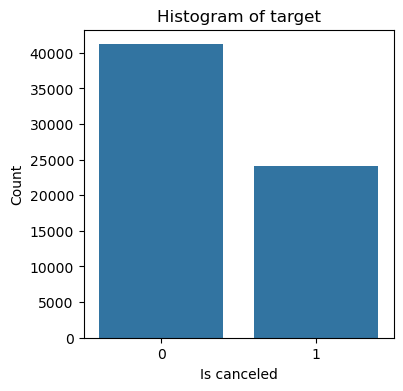

In [13]:
plt.figure(figsize=(4, 4))
sns.countplot(x=train['is_canceled'])
plt.title('Histogram of target')
plt.xlabel('Is canceled')
plt.ylabel('Count')
plt.show()

#### The target is imbalanced

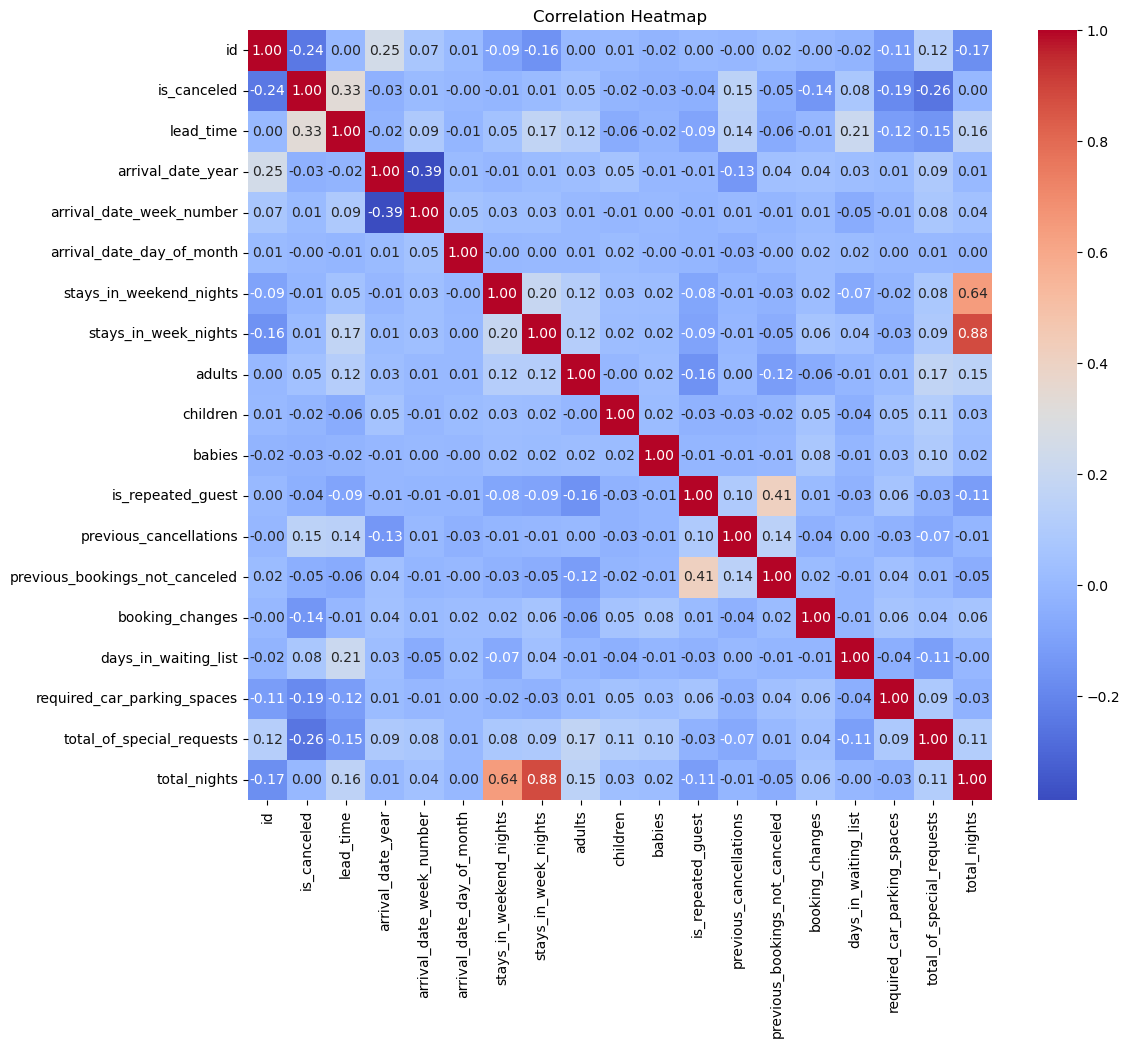

In [15]:
numeric_data = train.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### We can see correlation between target and lead time, previous cancelletions, booking changes, days in waiting list, parking place and special requests
#### Let's look closer

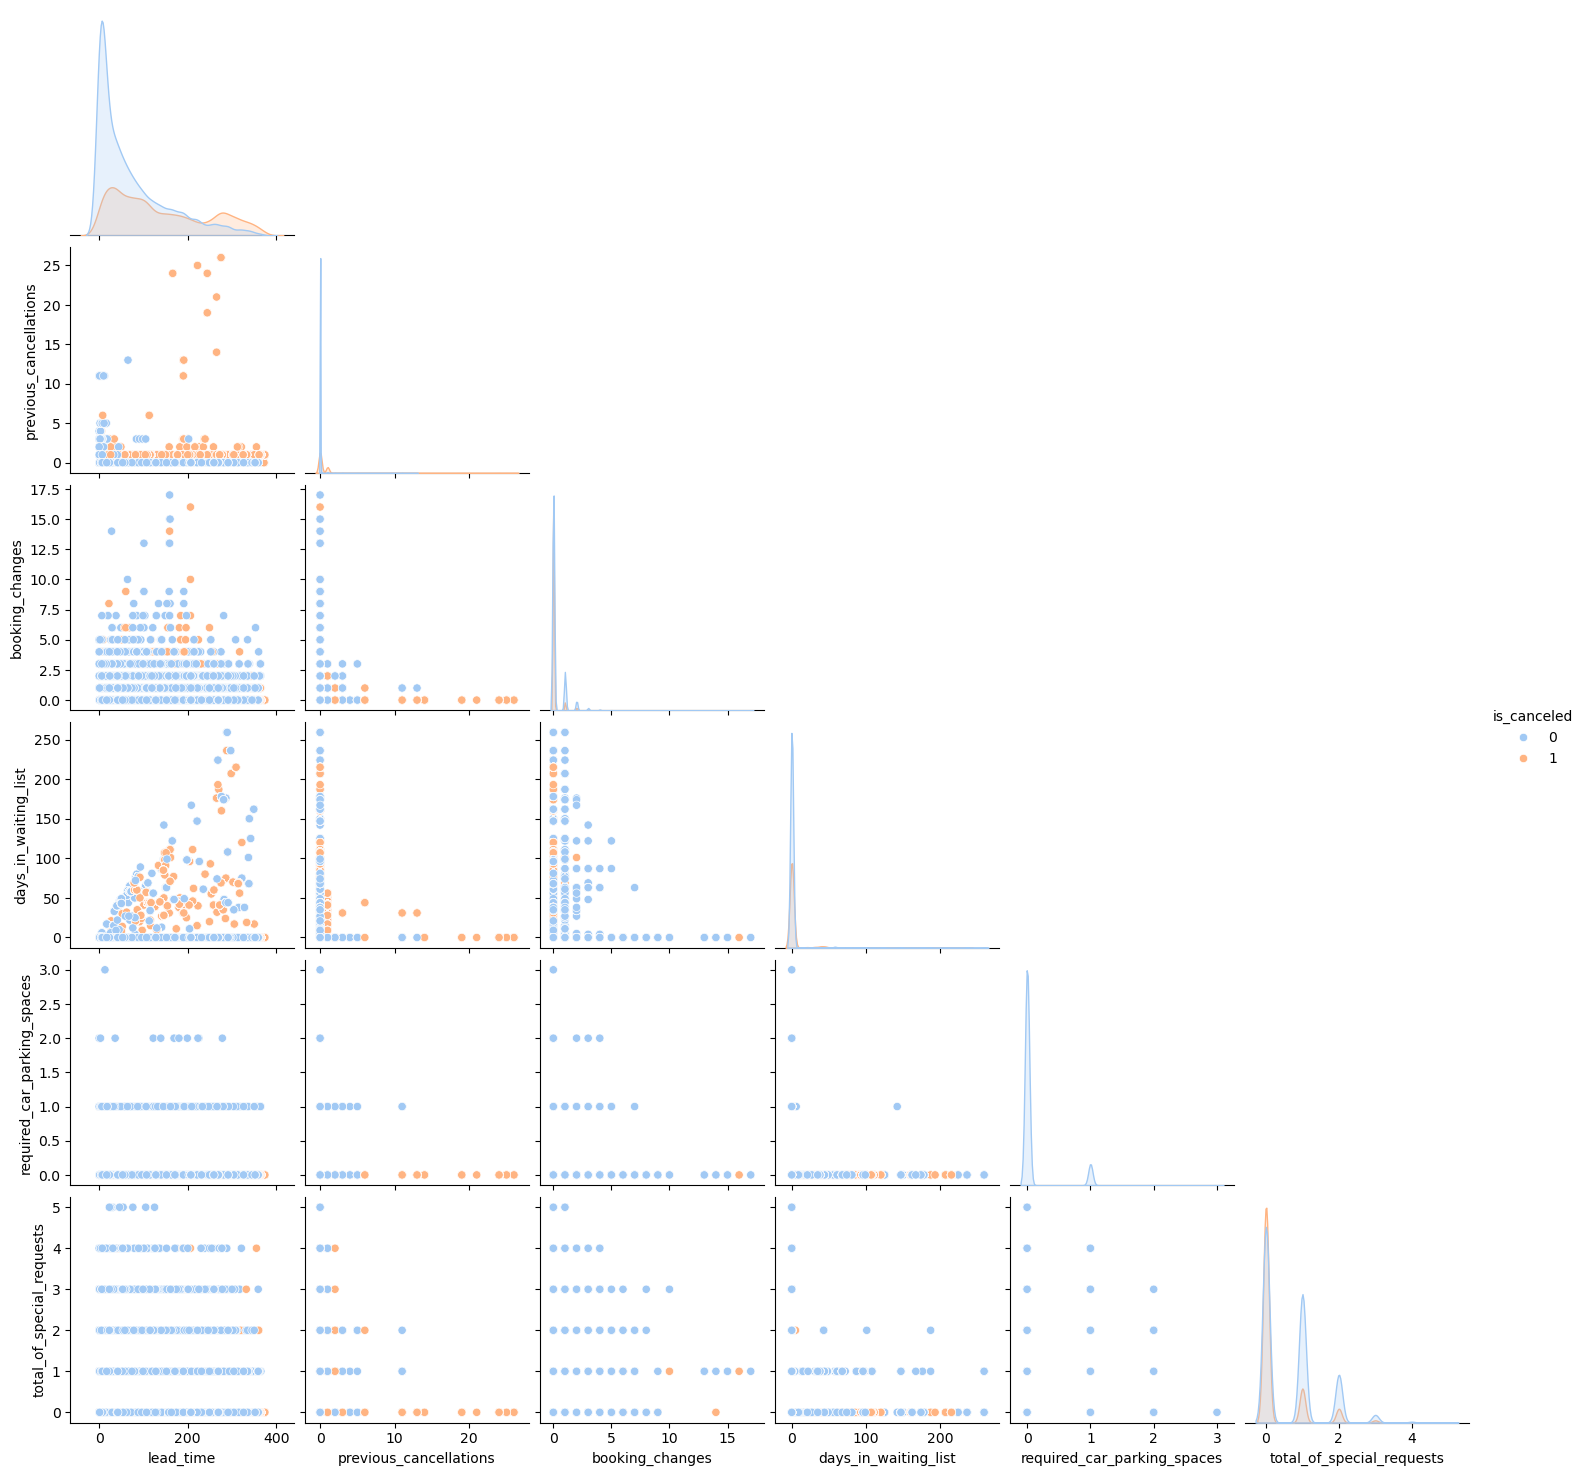

In [17]:
features_corr = ['is_canceled', 'lead_time', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

sns.pairplot(data = train[features_corr], hue='is_canceled', palette='pastel', corner=True)

In [18]:
train[features_corr].describe()

,is_canceled,lead_time,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,0.368609,96.337917,0.128915,0.194269,3.334422,0.056647,0.512763
std,0.482431,96.127545,0.965326,0.593838,18.239606,0.232094,0.752590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,151.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,374.000000,26.000000,17.000000,259.000000,3.000000,5.000000


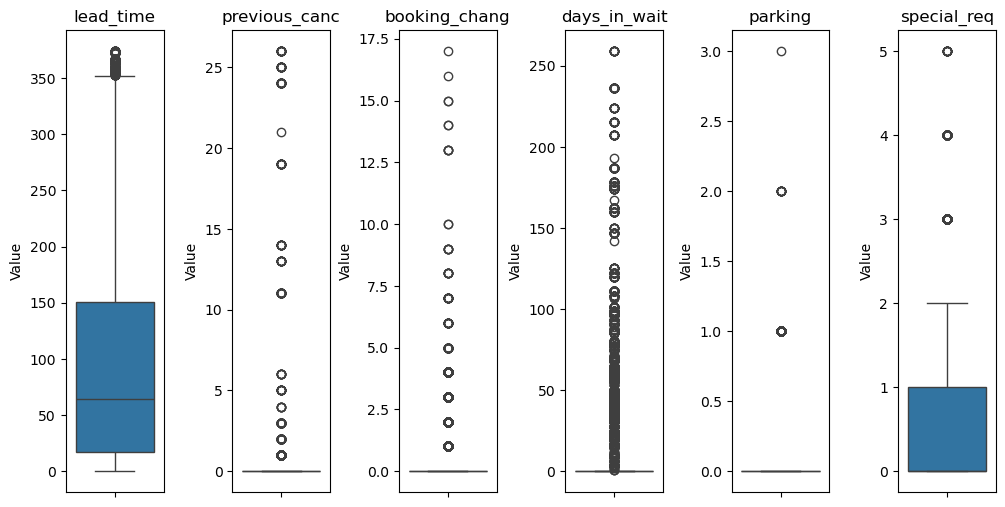

In [19]:
fig, axes = plt.subplots(1, 6, figsize=(12, 6))

sns.boxplot(y=train['lead_time'], ax=axes[0])
axes[0].set_title('lead_time')
axes[0].set_ylabel('Value')

sns.boxplot(y=train['previous_cancellations'], ax=axes[1])
axes[1].set_title('previous_canc')
axes[1].set_ylabel('Value')

sns.boxplot(y=train['booking_changes'], ax=axes[2])
axes[2].set_title('booking_chang')
axes[2].set_ylabel('Value')

sns.boxplot(y=train['days_in_waiting_list'], ax=axes[3])
axes[3].set_title('days_in_wait')
axes[3].set_ylabel('Value')

sns.boxplot(y=train['required_car_parking_spaces'], ax=axes[4])
axes[4].set_title('parking')
axes[4].set_ylabel('Value')

sns.boxplot(y=train['total_of_special_requests'], ax=axes[5])
axes[5].set_title('special_req')
axes[5].set_ylabel('Value')

plt.subplots_adjust(wspace=0.7)
plt.show()

#### Lead time has outliers that need to be deleted before ML
#### Others feature could be changed as categorial features 0 and > 0
#### Let's check them before changes

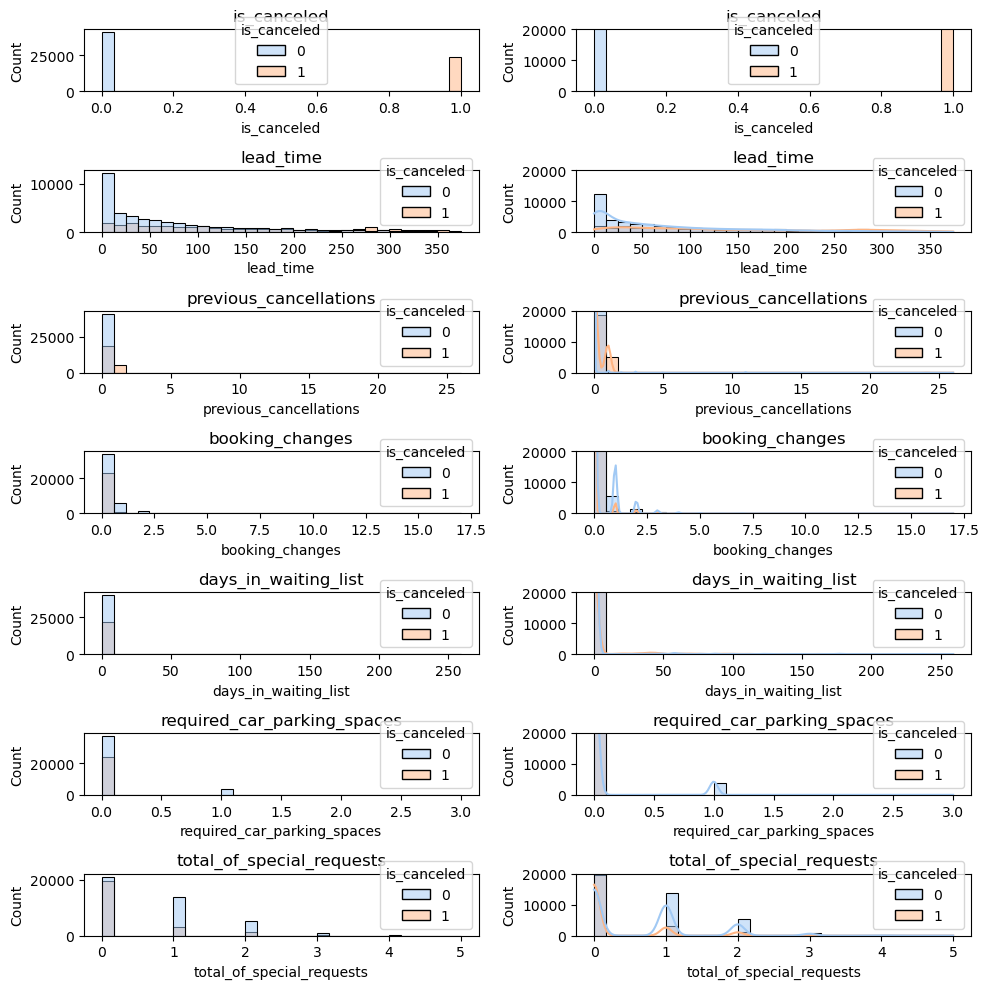

In [21]:
fig=plt.figure(figsize=(10,10))
for i, var_name in enumerate(features_corr):
    ax=fig.add_subplot(7,2,2*i+1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='is_canceled',fill = True, palette = 'pastel')
    ax.set_title(var_name)
    
    # truncated plot
    ax=fig.add_subplot(7,2,2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='is_canceled',fill = True, palette = 'pastel')
    plt.ylim([0,20000])
    ax.set_title(var_name)
fig.tight_layout()  
plt.show()

## Feature engineering

In [23]:
train[['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']] = (train[['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']] > 0).astype(int) # make 0 and 1
train['lead_time'] = (train['lead_time'] > 250).astype(int) # make 0 and 1 (i choosed 250 basde on hist

test[['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']] = (test[['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']] > 0).astype(int) # make 0 and 1
test['lead_time'] = (test['lead_time'] > 250).astype(int) # make 0 and 1 (i choosed 250 basde on hist

train[features_corr].head()

,is_canceled,lead_time,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1


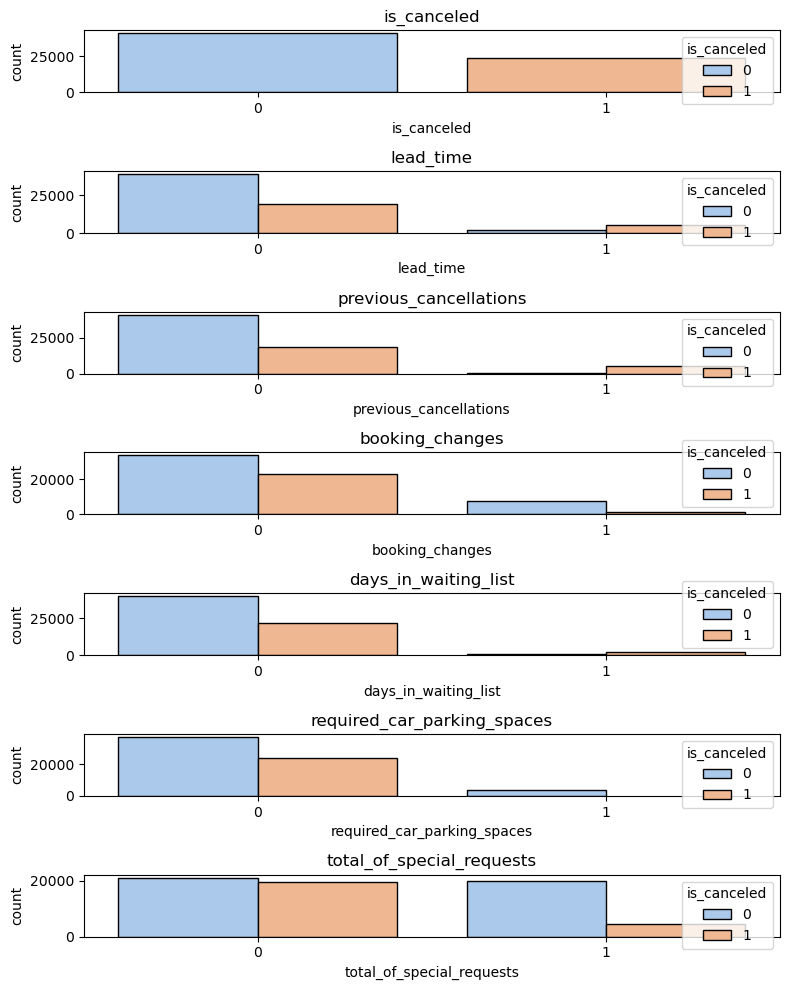

In [24]:
fig=plt.figure(figsize=(8,10))
for i, var_name in enumerate(features_corr):
    ax=fig.add_subplot(7,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='is_canceled', fill = True, palette = 'pastel', edgecolor = 'black')
    ax.set_title(var_name)
    fig.tight_layout()
plt.show()

#### All of selected features has a different distribution for the target 

## Model Training and Evaluation

In [27]:
from sklearn.model_selection import train_test_split

target = train['is_canceled']
features = train[['lead_time', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']]

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

features_train

,lead_time,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
7918,0,0,1,0,0,1
18641,0,0,0,0,0,1
31995,0,0,0,0,0,0
30742,0,0,0,0,0,0
26014,0,0,0,0,0,0
...,...,...,...,...,...,...
19876,0,0,0,0,0,0
2177,0,0,0,0,0,1
64797,0,0,0,0,1,1
11749,0,0,0,0,0,0


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 

score = accuracy_score(target_valid, predicted_valid)
score

0.7325852342408634

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Classifiers
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=12345),
    "KNN" : KNeighborsClassifier(),
    #"SVC" : SVC(random_state=0, probability=True),
    "RandomForest" : RandomForestClassifier(random_state=12345),
    #"XGBoost" : XGBClassifier(random_state=12345, use_label_encoder=False, eval_metric='logloss'), # XGBoost takes too long
    "LGBM" : LGBMClassifier(random_state=12345),
    "CatBoost" : CatBoostClassifier(random_state=12345, verbose=False),
    "NaiveBayes": GaussianNB()
}

# Grids for grid search
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

NB_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

# Dictionary of all grids
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "SVC" : SVC_grid,
    "RandomForest" : RF_grid,
    "XGBoost" : boosted_grid,
    "LGBM" : boosted_grid,
    "CatBoost" : boosted_grid,
    "NaiveBayes": NB_grid
}

In [30]:
from sklearn.model_selection import GridSearchCV
import time

i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(features_train, target_train)
    valid_scores.iloc[i,1]=clf.score(features_valid, target_valid,)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

C:\Users\novoselya.pa\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\novoselya.pa\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\novoselya.pa\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\novoselya.pa\AppData\Local\anaconda3\L

Model: LogisticRegression
Training time (mins): 0.05

Model: KNN
Training time (mins): 0.29

Model: RandomForest
Training time (mins): 0.32

[LightGBM] [Info] Number of positive: 17967, number of negative: 30954
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 48921, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367266 -> initscore=-0.543965
[LightGBM] [Info] Start training from score -0.543965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

In [31]:
valid_scores

,Classifer,Validation accuracy,Training time
0,LogisticRegression,0.732585,0.05
1,KNN,0.691011,0.29
2,RandomForest,0.732585,0.32
3,LGBM,0.732585,0.23
4,CatBoost,0.732585,0.73
5,NaiveBayes,0.504476,0.00


#### We have simple train_set for ML because of all features is binary values. All of methods predicted the same. OK, now we have not bad score 0.73, maybe later we do it in another way

## Submission

In [34]:
target_t = test['is_canceled']
features_t = test[['lead_time', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']]

In [35]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_t) 

score = accuracy_score(target_t, predicted_valid)
score

0.6239355794150314

#### That's a bad result. We should do it in another way. Let's try to take most correlation values in original ways.

In [37]:
train = pd.read_csv(r'C:\Users\novoselya.pa\Nov_work\DS\_study notebooks\_study datasets\hotel_train.csv')
test = pd.read_csv(r'C:\Users\novoselya.pa\Nov_work\DS\_study notebooks\_study datasets\hotel_test.csv')

In [38]:
target = train['is_canceled']
features = train[['lead_time', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']]

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [39]:
target_t = test['is_canceled']
features_t = test[['lead_time', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']]

In [40]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 

score = accuracy_score(target_valid, predicted_valid)
score

0.784522933529556

In [41]:
predicted_valid = model.predict(features_t) 

score = accuracy_score(target_t, predicted_valid)
score

0.6654634086140936

#### That's really better, let's check more methods

In [43]:
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(features_train, target_train)
    valid_scores.iloc[i,1]=clf.score(features_valid, target_valid,)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

C:\Users\novoselya.pa\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\novoselya.pa\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\novoselya.pa\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\novoselya.pa\AppData\Local\anaconda3\L

Model: LogisticRegression
Training time (mins): 0.04

Model: KNN
Training time (mins): 0.06

Model: RandomForest
Training time (mins): 0.54

[LightGBM] [Info] Number of positive: 17967, number of negative: 30954
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 48921, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367266 -> initscore=-0.543965
[LightGBM] [Info] Start training from score -0.543965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [44]:
valid_scores

,Classifer,Validation accuracy,Training time
0,LogisticRegression,0.741599,0.04
1,KNN,0.768702,0.06
2,RandomForest,0.783848,0.54
3,LGBM,0.787528,0.22
4,CatBoost,0.789980,2.32
5,NaiveBayes,0.651091,0.00


In [45]:
clf_best_params

{'LogisticRegression': {'C': 0.25, 'max_iter': 50, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9, 'p': 1},
 'RandomForest': {'max_depth': 12, 'n_estimators': 300},
 'LGBM': {'learning_rate': 0.15, 'max_depth': 8, 'n_estimators': 150},
 'CatBoost': {'learning_rate': 0.15, 'max_depth': 12, 'n_estimators': 200},
 'NaiveBayes': {'var_smoothing': 1e-07}}

## CatBoost CV

In [47]:
model = CatBoostClassifier(random_state=12345, verbose=False, learning_rate = 0.15, max_depth = 12, n_estimators = 200)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 

score = accuracy_score(target_valid, predicted_valid)
score

0.7899803777287221

In [48]:
predicted_valid = model.predict(features_t) 

score = accuracy_score(target_t, predicted_valid)
score

0.6848080957669999

#### Overfitting. We need to decrease parameters

In [50]:
model = CatBoostClassifier(random_state=12345, verbose=False, learning_rate = 0.10, max_depth = 5, n_estimators = 50)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 

score = accuracy_score(target_valid, predicted_valid)
score

0.7683345597252882

In [51]:
predicted_valid = model.predict(features_t) 

score = accuracy_score(target_t, predicted_valid)
score

0.6933851659879057

#### A little bit better. Let's use CV

In [53]:
from sklearn.model_selection import cross_val_score

model = CatBoostClassifier(random_state=12345, verbose=False, learning_rate = 0.10, max_depth = 5, n_estimators = 50)

scores = cross_val_score(model, features, target, cv=20) 

final_score = pd.Series(scores).mean()

print('CV mean train:', final_score)

CV mean train: 0.751915029468717


In [54]:
scores_cb = cross_val_score(model, features_t, target_t, cv=20) 

final_score = pd.Series(scores_cb).mean()

print('CV mean test:', final_score)

CV mean test: 0.7102608129412571


#### Wow! 

## LGBM CV

In [57]:
model = LGBMClassifier(random_state=12345, learning_rate = 0.15, max_depth = 8, n_estimators = 150)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 

score = accuracy_score(target_valid, predicted_valid)
score

[LightGBM] [Info] Number of positive: 17967, number of negative: 30954
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 48921, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367266 -> initscore=-0.543965
[LightGBM] [Info] Start training from score -0.543965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

0.7875275938189845

In [58]:
predicted_valid = model.predict(features_t) 

score = accuracy_score(target_t, predicted_valid)
score

0.6854251511785758

#### Overfitting again

In [60]:
model = LGBMClassifier(random_state=12345, learning_rate = 0.10, max_depth = 5, n_estimators = 50)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 

score = accuracy_score(target_valid, predicted_valid)
score

[LightGBM] [Info] Number of positive: 17967, number of negative: 30954
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 48921, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367266 -> initscore=-0.543965
[LightGBM] [Info] Start training from score -0.543965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

0.7704194260485652

In [61]:
predicted_valid = model.predict(features_t) 

score = accuracy_score(target_t, predicted_valid)
score

0.6930149327409602

#### A little bit better again. Let's use CV

In [63]:
model = LGBMClassifier(random_state=12345, learning_rate = 0.10, max_depth = 5, n_estimators = 50)

scores = cross_val_score(model, features, target, cv=20) 

final_score = pd.Series(scores).mean()

print('CV mean train:', final_score)

[LightGBM] [Info] Number of positive: 22842, number of negative: 39125
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 61967, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368616 -> initscore=-0.538161
[LightGBM] [Info] Start training from score -0.538161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [64]:
scores_lgbm = cross_val_score(model, features_t, target_t, cv=20) 

final_score = pd.Series(scores_lgbm).mean()

print('CV mean test:', final_score)

[LightGBM] [Info] Number of positive: 11961, number of negative: 18830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 30791, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.388458 -> initscore=-0.453800
[LightGBM] [Info] Start training from score -0.453800
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

Text(0, 0.5, 'Value')

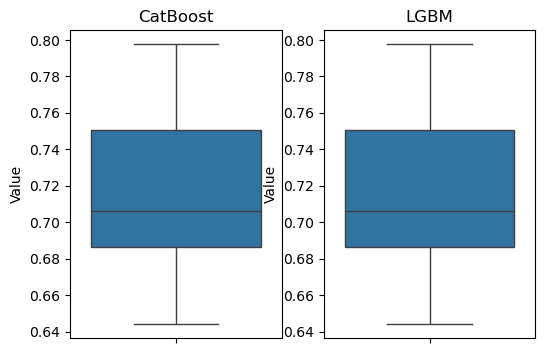

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

sns.boxplot(y=scores_cb, ax=axes[0])
axes[0].set_title('CatBoost')
axes[0].set_ylabel('Value')

sns.boxplot(y=scores_cb, ax=axes[1])
axes[1].set_title('LGBM')
axes[1].set_ylabel('Value')

#### Close results between CatBoost and LGBM. Let's use LGBM bc it's a little faster

In [67]:
model = LGBMClassifier(random_state=12345, learning_rate = 0.10, max_depth = 5, n_estimators = 50)
model.fit(features_train, target_train)

preds = model.predict(features_t)

test['preds'] = preds

test

[LightGBM] [Info] Number of positive: 17967, number of negative: 30954
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 48921, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367266 -> initscore=-0.543965
[LightGBM] [Info] Start training from score -0.543965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,preds
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,A,0,0,Transient,0,0,1,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,A,0,0,Transient,0,1,4,0
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,A,0,0,Transient,0,1,4,0
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,A,0,0,Transient,0,1,4,0
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,A,0,0,Transient,0,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,97899,0,164.0,2017,August,35,31,2,4,2.0,...,0,0,A,0,0,Transient,0,0,6,1
32408,97900,0,21.0,2017,August,35,30,2,5,2.0,...,0,0,A,0,0,Transient,0,2,7,0
32409,97901,0,23.0,2017,August,35,30,2,5,2.0,...,0,0,A,0,0,Transient,0,0,7,0
32410,97902,0,34.0,2017,August,35,31,2,5,2.0,...,0,0,D,0,0,Transient,0,4,7,0


In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test['is_canceled'], test['preds'])
recall = recall_score(test['is_canceled'], test['preds'])
f1 = f1_score(test['is_canceled'], test['preds'])

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1: {f1:.2f}')

Precision: 0.66
Recall: 0.43
F1: 0.52


#### It's not so clear right now that precision or recall we should increase. I guess recall bc if more people should be pay deposite then less losses will be. But... maybe if we'll do it, clients would search another hotels without deposites

In [143]:
y_proba = model.predict_proba(features_t)[:, 1] 

threshold = 0.3
for threshold in [0.2, 0.3, 0.4, 0.5]:
    preds = (y_proba >= threshold).astype(int)
    test['preds'] = preds

    precision = precision_score(test['is_canceled'], test['preds'])
    recall = recall_score(test['is_canceled'], test['preds'])
    f1 = f1_score(test['is_canceled'], test['preds'])

    print((f'If threshold {threshold}:'))
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1: {f1:.2f}')
    print()

If threshold 0.2:
Precision: 0.48
Recall: 0.92
F1: 0.63

If threshold 0.3:
Precision: 0.63
Recall: 0.62
F1: 0.62

If threshold 0.4:
Precision: 0.65
Recall: 0.58
F1: 0.61

If threshold 0.5:
Precision: 0.66
Recall: 0.43
F1: 0.52



#### Threshold 0.2 looks really good for our goal. Almost all cancellations is detected (recall 0.92). But also we have >50% mistakes.

In [146]:
preds = (y_proba >= 0.2).astype(int)
test['preds'] = preds
test

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,preds
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,A,0,0,Transient,0,0,1,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,A,0,0,Transient,0,1,4,1
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,A,0,0,Transient,0,1,4,1
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,A,0,0,Transient,0,1,4,1
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,A,0,0,Transient,0,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,97899,0,164.0,2017,August,35,31,2,4,2.0,...,0,0,A,0,0,Transient,0,0,6,1
32408,97900,0,21.0,2017,August,35,30,2,5,2.0,...,0,0,A,0,0,Transient,0,2,7,1
32409,97901,0,23.0,2017,August,35,30,2,5,2.0,...,0,0,A,0,0,Transient,0,0,7,1
32410,97902,0,34.0,2017,August,35,31,2,5,2.0,...,0,0,D,0,0,Transient,0,4,7,1


In [154]:
test['preds'].value_counts()

preds
1    24305
0     8107
Name: count, dtype: int64

In [156]:
test['is_canceled'].value_counts()

is_canceled
0    19821
1    12591
Name: count, dtype: int64

## Profit calculation

In [317]:
test['reserved_room_type'] = test['reserved_room_type'].str.strip() # fix excess spaces

test.loc[test['reserved_room_type'] == 'A', ['price_per_day', 'cleaning_per_day']] = [1000, 400]
test.loc[test['reserved_room_type'] == 'B', ['price_per_day', 'cleaning_per_day']] = [800, 350]
test.loc[test['reserved_room_type'] == 'C', ['price_per_day', 'cleaning_per_day']] = [600, 350]
test.loc[test['reserved_room_type'] == 'D', ['price_per_day', 'cleaning_per_day']] = [550, 150]
test.loc[test['reserved_room_type'] == 'E', ['price_per_day', 'cleaning_per_day']] = [500, 150]
test.loc[test['reserved_room_type'] == 'F', ['price_per_day', 'cleaning_per_day']] = [450, 150]
test.loc[test['reserved_room_type'] == 'G', ['price_per_day', 'cleaning_per_day']] = [350, 150]

In [319]:
print(test['arrival_date_month'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


In [321]:
print(test['total_nights'].unique())

[ 1  4  7  2  5  6  3  8  9 10]


In [323]:
test.loc[test['arrival_date_month'].isin(['March', 'April', 'May']), ['price_per_day', 'cleaning_per_day']] = [1000 * 1.2, 400 * 1.2]
test.loc[test['arrival_date_month'].isin(['June', 'July', 'August']), ['price_per_day', 'cleaning_per_day']] = [1000 * 1.4, 400 * 1.4]

In [325]:
test.loc[(test['is_canceled'] == 1) & (test['preds'] == 1), 'profit_preds'] = (-test['price_per_day'] * 0.2 - test['cleaning_per_day'] * 0.2)
test.loc[(test['is_canceled'] == 1) & (test['preds'] == 0), 'profit_preds'] = (- test['price_per_day'] - test['cleaning_per_day'])

test['total_nights'] = test['total_nights'].astype(str)
test['total_nights'] = test['total_nights'].str.strip().astype(int) # fix excess spaces
test.loc[test['is_canceled'] == 0, 'profit_preds'] = (test['price_per_day'] * test['total_nights'] - test['cleaning_per_day'] - np.floor(test['total_nights']/2)*test['cleaning_per_day'])

In [327]:
test.loc[test['is_canceled'] == 1, 'profit_init'] = (- test['price_per_day'] - test['cleaning_per_day'])
test.loc[test['is_canceled'] == 0, 'profit_init'] = (test['price_per_day'] * test['total_nights'] - test['cleaning_per_day'] - np.floor(test['total_nights']/2)*test['cleaning_per_day'])

In [329]:
test.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,preds,price_per_day,cleaning_per_day,profit_preds,profit_init
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,Transient,0,0,1,1,1000.0,400.0,-280.0,-1400.0
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,Transient,0,1,4,1,1000.0,400.0,-280.0,-1400.0
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,Transient,0,1,4,1,1000.0,400.0,-280.0,-1400.0
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,Transient,0,1,4,1,1000.0,400.0,-280.0,-1400.0
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,Transient,0,0,7,1,1000.0,400.0,-280.0,-1400.0


In [331]:
print(f'Прибыль без внедрения модели: {test['profit_init'].sum()}')
print(f'Прибыль c внедрением модели: {test['profit_preds'].sum()}')
print(f'Отношение двух прибылей: {(test['profit_preds'].sum()/test['profit_init'].sum()):.2f}')

Прибыль без внедрения модели: 32225570.0
Прибыль c внедрением модели: 48093594.0
Отношение двух прибылей: 1.49


#### Using the ML model we increased our profit in 49% in a time period of six months. 
#### This result was achieved due to high recall and small chance to have canceled order without deposite.